In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Regressão Linear

In [3]:
df_reservatorio = pd.read_csv('clorofila.csv')

In [4]:
df_reservatorio.head()

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez,Clorofila
0,121.73,8.32,7.47,198.04,0.37,20.55,6.98,59.97
1,121.29,5.67,6.90,231.30,0.40,19.98,4.65,30.59
2,120.77,5.33,6.79,229.20,0.42,19.61,3.94,17.06
3,119.50,7.61,7.10,228.61,0.41,19.47,5.20,38.00
4,121.17,7.96,7.12,208.77,0.39,19.73,4.76,24.39


In [6]:
X = df_reservatorio.drop(['Clorofila'], axis=1)
Y = df_reservatorio['Clorofila']

In [7]:
X = sm.add_constant(X) 

In [8]:
modelo_linear_multiplo = sm.OLS(Y,X)
modelo_linear_multiplo = modelo_linear_multiplo.fit()

In [10]:
print(modelo_linear_multiplo.summary())

                            OLS Regression Results                            
Dep. Variable:              Clorofila   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     75.55
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.75e-74
Time:                        20:18:01   Log-Likelihood:                -1914.5
No. Observations:                 512   AIC:                             3845.
Df Residuals:                     504   BIC:                             3879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -46.1466      7.801     -5.916

# Autocorrelação 

A Autocorrelação dos resíduos vai ser identificada pelo Termo Durbin-Watson na tabela.

In [13]:
erro_clo = Y - modelo_linear_multiplo.predict(X)

In [14]:
df_reservatorio.reset_index(inplace = True)

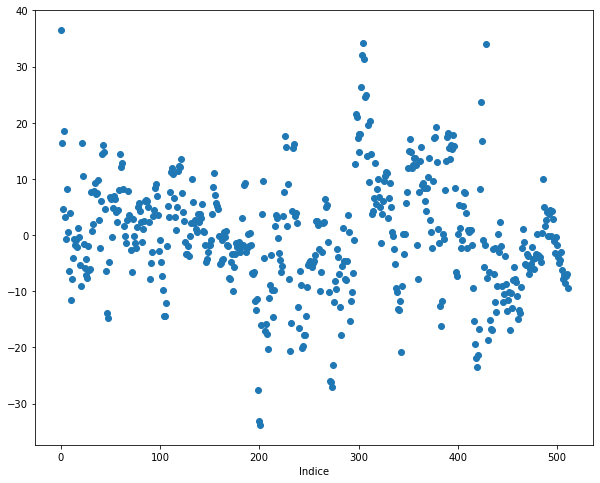

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(df_reservatorio['index'], erro_clo)
plt.xlabel('Indice')
plt.show()

Há realmente uma leve tendência. 

Analisando pelo summary acima vemos que o teste de Durbin Watson fica em 0.393 , ou seja , indica correlação positiva 

# Homocedasticidade

Vamos plotar um gráfico de resíduos versus o valor previsto.

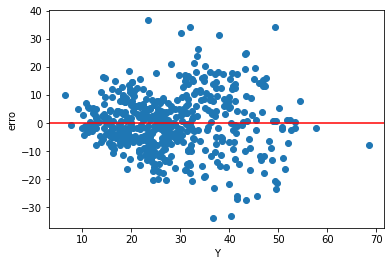

In [17]:
erro = (Y - modelo_linear_multiplo.predict(X))
plt.scatter(modelo_linear_multiplo.predict(X), erro)
plt.axhline(0 , color='r')
plt.xlabel('Y')
plt.ylabel('erro')
plt.show()

Erros parecem ser homocedasticos , uma vez que ficam entre um intervalo determinado.

* teste de Breusch-Pagan

* Hipótese nula (H0): Siginifca que há Homoscedasticidade
* Hipótese alternativa (Ha): Significa que não há Homoscedasticidade (i.e. há heteroscedasticidade)

In [23]:
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [24]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

In [25]:
test_result = sms.het_breuschpagan(modelo_linear_multiplo.resid, modelo_linear_multiplo.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 70.98391949694877),
 ('p-value', 9.344822278512152e-13),
 ('f-value', 11.588788776025032),
 ('f p-value', 1.0900663765999092e-13)]

como o p valor é menor que 0.05, logo aceitamos HO , afirmando que o modelo tem homodedasticidade 

# Multicolinearidade

In [37]:
from sklearn.datasets import load_boston

In [38]:
boston = load_boston()

C:\Users\vibrsilva\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [39]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [40]:
X_boston = boston["data"]
Y_boston = boston["target"]

columns = list(boston["feature_names"])

In [41]:
inp_df = pd.DataFrame(X_boston , columns = columns)

In [42]:
import seaborn as sns

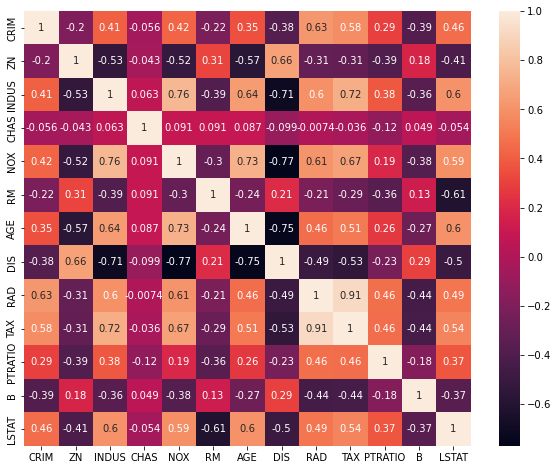

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(inp_df.corr() , annot = True)
plt.show()

In [44]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = inp_df.columns 
  
# calculando VIF 
vif_data["VIF"] = [variance_inflation_factor(inp_df.values, i) for i in range(len(inp_df.columns))] 
  
print(vif_data)

    feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


Como uma regra geral, podemos considerar um VIF > 10 alto e entender que os coeficientes das features sofrerão problemas.